### Mengakses API Publik Covid-19
##### https://data.covid19.go.id/public/api/update.json

In [1]:
import requests

resp = requests.get('https://data.covid19.go.id/public/api/update.json')
resp

<Response [200]>

### Headers API

In [2]:
print(resp.headers)

{'Server': 'nginx', 'Date': 'Wed, 11 Aug 2021 13:20:03 GMT', 'Content-Type': 'application/json', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding, Accept-Encoding', 'Last-Modified': 'Wed, 11 Aug 2021 13:16:06 GMT', 'ETag': 'W/"6113cd96-31d98"', 'X-Content-Type-Options': 'nosniff, nosniff', 'X-XSS-Protection': '1; mode=block, 1; mode=block', 'Strict-Transport-Security': 'max-age=31536000; includeSubDomains; preload', 'Content-Encoding': 'gzip'}


### Mengekstrak isi respon

In [3]:
covid_raw = resp.json()
covid_raw

{'data': {'id': 1,
  'jumlah_odp': 286417,
  'jumlah_pdp': 0,
  'total_spesimen': 28586360,
  'total_spesimen_negatif': 19855058},
 'update': {'penambahan': {'jumlah_positif': 30625,
   'jumlah_meninggal': 1579,
   'jumlah_sembuh': 39931,
   'jumlah_dirawat': -10885,
   'tanggal': '2021-08-11',
   'created': '2021-08-11 16:46:44'},
  'harian': [{'key_as_string': '2020-03-02T00:00:00.000Z',
    'key': 1583107200000,
    'doc_count': 1,
    'jumlah_meninggal': {'value': 0},
    'jumlah_sembuh': {'value': 0},
    'jumlah_positif': {'value': 2},
    'jumlah_dirawat': {'value': 2},
    'jumlah_positif_kum': {'value': 2},
    'jumlah_sembuh_kum': {'value': 0},
    'jumlah_meninggal_kum': {'value': 0},
    'jumlah_dirawat_kum': {'value': 2}},
   {'key_as_string': '2020-03-03T00:00:00.000Z',
    'key': 1583193600000,
    'doc_count': 1,
    'jumlah_meninggal': {'value': 0},
    'jumlah_sembuh': {'value': 0},
    'jumlah_positif': {'value': 0},
    'jumlah_dirawat': {'value': 0},
    'jumlah_po

In [4]:
# ubah ke dataframe
import pandas as pd
covid_df = pd.DataFrame(covid_raw)
covid_df

,data,update
id,1.0,NaN
jumlah_odp,286417.0,NaN
jumlah_pdp,0.0,NaN
total_spesimen,28586360.0,NaN
total_spesimen_negatif,19855058.0,NaN
penambahan,NaN,"{'jumlah_positif': 30625, 'jumlah_meninggal': ..."
harian,NaN,"[{'key_as_string': '2020-03-02T00:00:00.000Z',..."
total,NaN,"{'jumlah_positif': 3749446, 'jumlah_dirawat': ..."


In [5]:
covid_df.shape

(8, 2)

In [6]:
len(covid_raw)

2

In [7]:
print('Length of cov_id_raw : %d.' %len(covid_raw))
print('Komponen cov_id_raw  : %s.' %covid_raw.keys())
cov_id_update = covid_raw['update']
cov_id_data = covid_raw['data']

Length of cov_id_raw : 2.
Komponen cov_id_raw  : dict_keys(['data', 'update']).


In [8]:
cov_id_data

{'id': 1,
 'jumlah_odp': 286417,
 'jumlah_pdp': 0,
 'total_spesimen': 28586360,
 'total_spesimen_negatif': 19855058}

In [9]:
cov_id_update

{'penambahan': {'jumlah_positif': 30625,
  'jumlah_meninggal': 1579,
  'jumlah_sembuh': 39931,
  'jumlah_dirawat': -10885,
  'tanggal': '2021-08-11',
  'created': '2021-08-11 16:46:44'},
 'harian': [{'key_as_string': '2020-03-02T00:00:00.000Z',
   'key': 1583107200000,
   'doc_count': 1,
   'jumlah_meninggal': {'value': 0},
   'jumlah_sembuh': {'value': 0},
   'jumlah_positif': {'value': 2},
   'jumlah_dirawat': {'value': 2},
   'jumlah_positif_kum': {'value': 2},
   'jumlah_sembuh_kum': {'value': 0},
   'jumlah_meninggal_kum': {'value': 0},
   'jumlah_dirawat_kum': {'value': 2}},
  {'key_as_string': '2020-03-03T00:00:00.000Z',
   'key': 1583193600000,
   'doc_count': 1,
   'jumlah_meninggal': {'value': 0},
   'jumlah_sembuh': {'value': 0},
   'jumlah_positif': {'value': 0},
   'jumlah_dirawat': {'value': 0},
   'jumlah_positif_kum': {'value': 2},
   'jumlah_sembuh_kum': {'value': 0},
   'jumlah_meninggal_kum': {'value': 0},
   'jumlah_dirawat_kum': {'value': 2}},
  {'key_as_string': '

In [10]:
cov_id_update.keys()

dict_keys(['penambahan', 'harian', 'total'])

In [11]:
cov_id_update['total']

{'jumlah_positif': 3749446,
 'jumlah_dirawat': 426170,
 'jumlah_sembuh': 3211078,
 'jumlah_meninggal': 112198}

### Analisa data covid-19

In [12]:
print(f'Penambahan Covid-19 Tanggal Hari Ini: {cov_id_update["penambahan"]["tanggal"]}')
print(f'Penambahan Kasus Positif: {cov_id_update["penambahan"]["jumlah_positif"]}')
print(f'Penambahan Kasus Meninggal: {cov_id_update["penambahan"]["jumlah_meninggal"]}')
print(f'Penambahan Kasus Sembuh: {cov_id_update["penambahan"]["jumlah_sembuh"]}')
print(f'Total Kasus Positif: {cov_id_update["total"]["jumlah_positif"]}')
print(f'Total Kasus Sembuh: {cov_id_update["total"]["jumlah_sembuh"]}')
print(f'Total Kasus Meninggal: {cov_id_update["total"]["jumlah_meninggal"]}')

Penambahan Covid-19 Tanggal Hari Ini: 2021-08-11
Penambahan Kasus Positif: 30625
Penambahan Kasus Meninggal: 1579
Penambahan Kasus Sembuh: 39931
Total Kasus Positif: 3749446
Total Kasus Sembuh: 3211078
Total Kasus Meninggal: 112198


## Analisis Covid-19 di Kalimantan Selatan

In [13]:
cov_kalsel = requests.get('https://data.covid19.go.id/public/api/prov_detail_KALIMANTAN_SELATAN.json')
cov_kalsel

<Response [200]>

In [14]:
cov_kalsel = cov_kalsel.json()
cov_kalsel

{'last_date': '2021-08-10',
 'provinsi': 'KALIMANTAN SELATAN',
 'kasus_total': 55256,
 'kasus_tanpa_tgl': 0,
 'kasus_dengan_tgl': 55256,
 'meninggal_persen': 2.960764441870566,
 'meninggal_tanpa_tgl': 7,
 'meninggal_dengan_tgl': 1629,
 'sembuh_persen': 77.42145649341248,
 'sembuh_tanpa_tgl': 110,
 'sembuh_dengan_tgl': 42670,
 'list_perkembangan': [{'tanggal': 1585526400000,
   'KASUS': 5,
   'MENINGGAL': 0,
   'SEMBUH': 0,
   'DIRAWAT_OR_ISOLASI': 5,
   'AKUMULASI_KASUS': 5,
   'AKUMULASI_SEMBUH': 0,
   'AKUMULASI_MENINGGAL': 0,
   'AKUMULASI_DIRAWAT_OR_ISOLASI': 5},
  {'tanggal': 1585612800000,
   'KASUS': 2,
   'MENINGGAL': 0,
   'SEMBUH': 0,
   'DIRAWAT_OR_ISOLASI': 2,
   'AKUMULASI_KASUS': 7,
   'AKUMULASI_SEMBUH': 0,
   'AKUMULASI_MENINGGAL': 0,
   'AKUMULASI_DIRAWAT_OR_ISOLASI': 7},
  {'tanggal': 1585699200000,
   'KASUS': 0,
   'MENINGGAL': 0,
   'SEMBUH': 0,
   'DIRAWAT_OR_ISOLASI': 0,
   'AKUMULASI_KASUS': 7,
   'AKUMULASI_SEMBUH': 0,
   'AKUMULASI_MENINGGAL': 0,
   'AKUMULASI

In [15]:
print('Length of cov_kalsel : %d.' %len(cov_kalsel))
print('Komponen cov_kalsel  : %s.' %cov_kalsel.keys())

Length of cov_kalsel : 13.
Komponen cov_kalsel  : dict_keys(['last_date', 'provinsi', 'kasus_total', 'kasus_tanpa_tgl', 'kasus_dengan_tgl', 'meninggal_persen', 'meninggal_tanpa_tgl', 'meninggal_dengan_tgl', 'sembuh_persen', 'sembuh_tanpa_tgl', 'sembuh_dengan_tgl', 'list_perkembangan', 'data']).


In [16]:
# analisi data
print(f'Kasus Total di Kalsel: {cov_kalsel["kasus_total"]}')
print('Kasus Meninggal dalam persen: %.2f%%' %cov_kalsel["meninggal_persen"])
print('Kasus Sembuh dalam persen: %.2f%%' %cov_kalsel["sembuh_persen"])

Kasus Total di Kalsel: 55256
Kasus Meninggal dalam persen: 2.96%
Kasus Sembuh dalam persen: 77.42%


In [17]:
# buat dataframe dengan key list_perkembangan
cov_kalsel_df = pd.DataFrame(cov_kalsel['list_perkembangan'])
cov_kalsel_df

,tanggal,KASUS,MENINGGAL,SEMBUH,DIRAWAT_OR_ISOLASI,AKUMULASI_KASUS,AKUMULASI_SEMBUH,AKUMULASI_MENINGGAL,AKUMULASI_DIRAWAT_OR_ISOLASI
0,1585526400000,5,0,0,5,5,0,0,5
1,1585612800000,2,0,0,2,7,0,0,7
2,1585699200000,0,0,0,0,7,0,0,7
3,1585785600000,0,0,0,0,7,0,0,7
4,1585872000000,0,0,0,0,7,0,0,7
...,...,...,...,...,...,...,...,...,...
494,1628208000000,906,21,786,99,52394,40432,1488,10474
495,1628294400000,908,42,522,344,53302,40954,1530,10818
496,1628380800000,817,49,422,346,54119,41376,1579,11164
497,1628467200000,559,24,693,-158,54678,42069,1603,11006


In [18]:
# EDA
cov_kalsel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   tanggal                       499 non-null    int64
 1   KASUS                         499 non-null    int64
 2   MENINGGAL                     499 non-null    int64
 3   SEMBUH                        499 non-null    int64
 4   DIRAWAT_OR_ISOLASI            499 non-null    int64
 5   AKUMULASI_KASUS               499 non-null    int64
 6   AKUMULASI_SEMBUH              499 non-null    int64
 7   AKUMULASI_MENINGGAL           499 non-null    int64
 8   AKUMULASI_DIRAWAT_OR_ISOLASI  499 non-null    int64
dtypes: int64(9)
memory usage: 35.2 KB


In [19]:
cov_kalsel_new = (cov_kalsel_df.drop(columns=[col for col in cov_kalsel_df.columns if col.startswith('AKUMULASI') or 
                                             col.startswith('DIRAWAT')]).rename(columns=str.lower).rename(columns={'kasus':'kasus_baru'}))

In [20]:
cov_kalsel_new

,tanggal,kasus_baru,meninggal,sembuh
0,1585526400000,5,0,0
1,1585612800000,2,0,0
2,1585699200000,0,0,0
3,1585785600000,0,0,0
4,1585872000000,0,0,0
...,...,...,...,...
494,1628208000000,906,21,786
495,1628294400000,908,42,522
496,1628380800000,817,49,422
497,1628467200000,559,24,693


In [21]:
# format kolom tanggal jadi format datetime
cov_kalsel_new['tanggal'] = pd.to_datetime(cov_kalsel_new['tanggal']*1e6, unit='ns')
cov_kalsel_new

,tanggal,kasus_baru,meninggal,sembuh
0,2020-03-30,5,0,0
1,2020-03-31,2,0,0
2,2020-04-01,0,0,0
3,2020-04-02,0,0,0
4,2020-04-03,0,0,0
...,...,...,...,...
494,2021-08-06,906,21,786
495,2021-08-07,908,42,522
496,2021-08-08,817,49,422
497,2021-08-09,559,24,693


In [22]:
cov_kalsel_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   tanggal     499 non-null    datetime64[ns]
 1   kasus_baru  499 non-null    int64         
 2   meninggal   499 non-null    int64         
 3   sembuh      499 non-null    int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 15.7 KB


In [23]:
# cek missing value
cov_kalsel_new.isna().sum()

tanggal       0
kasus_baru    0
meninggal     0
sembuh        0
dtype: int64

In [24]:
cov_kalsel_new.describe()

,kasus_baru,meninggal,sembuh
count,499.000000,499.000000,499.000000
mean,110.733467,3.264529,85.511022
std,148.345234,5.579488,96.574738
min,0.000000,0.000000,0.000000
25%,39.000000,1.000000,27.000000
50%,73.000000,2.000000,61.000000
75%,118.000000,4.000000,109.000000
max,958.000000,49.000000,786.000000


### Plotting kasus_baru, meninggal, dan sembuh setiap tanggal 

In [25]:
import matplotlib.pyplot as plt

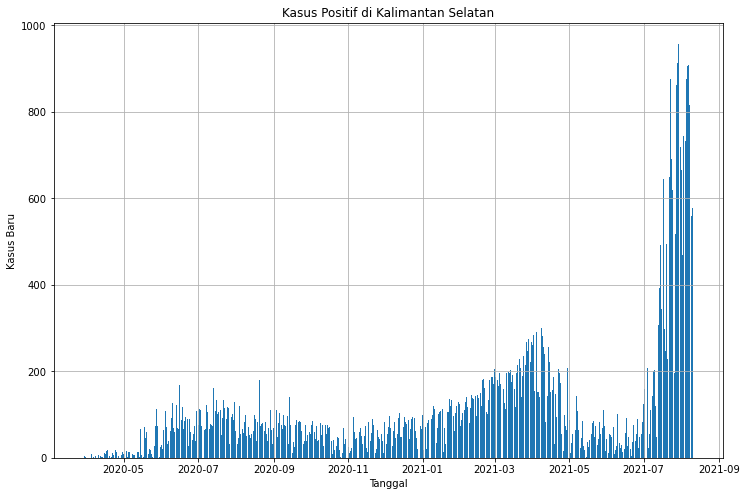

In [26]:
# kasus_baru
fig, ax = plt.subplots(figsize=(12,8))
ax.bar(data=cov_kalsel_new, x='tanggal', height='kasus_baru')
ax.set(
    title='Kasus Positif di Kalimantan Selatan',
    ylabel='Kasus Baru',
    xlabel='Tanggal'
)
plt.grid('y')
# plt.tight_layout()
plt.show()

In [27]:
import warnings
warnings.filterwarnings('ignore')

<Figure size 432x288 with 0 Axes>

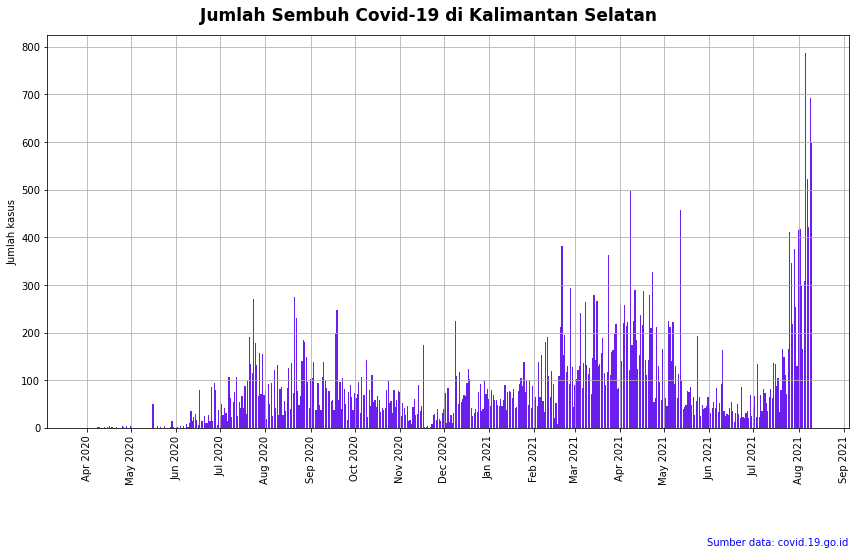

In [28]:
# jumlah sembuh di kalsel
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(12,8))
ax.bar(data=cov_kalsel_new, x='tanggal', height='sembuh', color='#6a1fef')
fig.suptitle('Jumlah Sembuh Covid-19 di Kalimantan Selatan', fontsize=17, fontweight='bold')
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus')
ax.text(1, -0.3, 'Sumber data: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation='90')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.grid('y')
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

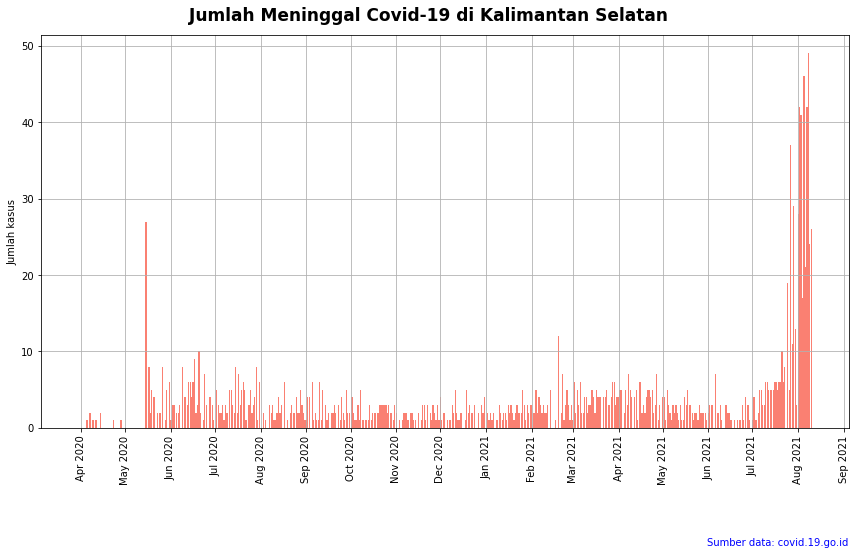

In [29]:
# jumlah meninggal covid-19 di kalsel
plt.clf()
fig, ax = plt.subplots(figsize=(12,8))
ax.bar(data=cov_kalsel_new, x='tanggal', height='meninggal', color='salmon')
fig.suptitle('Jumlah Meninggal Covid-19 di Kalimantan Selatan', fontsize=17, fontweight='bold')
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus')
ax.text(1, -0.3, 'Sumber data: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation='90')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.grid('y')
plt.tight_layout()
plt.show()

### plotting kasus per hari

In [30]:
cov_kalsel_new.tanggal[0]

Timestamp('2020-03-30 00:00:00')

In [31]:
cov_kalsel_new['base_date'] = cov_kalsel_new.tanggal[0]
cov_kalsel_new

,tanggal,kasus_baru,meninggal,sembuh,base_date
0,2020-03-30,5,0,0,2020-03-30
1,2020-03-31,2,0,0,2020-03-30
2,2020-04-01,0,0,0,2020-03-30
3,2020-04-02,0,0,0,2020-03-30
4,2020-04-03,0,0,0,2020-03-30
...,...,...,...,...,...
494,2021-08-06,906,21,786,2020-03-30
495,2021-08-07,908,42,522,2020-03-30
496,2021-08-08,817,49,422,2020-03-30
497,2021-08-09,559,24,693,2020-03-30


In [32]:
cov_kalsel_new['hari_ke'] = cov_kalsel_new.tanggal - cov_kalsel_new.base_date
cov_kalsel_new

,tanggal,kasus_baru,meninggal,sembuh,base_date,hari_ke
0,2020-03-30,5,0,0,2020-03-30,0 days
1,2020-03-31,2,0,0,2020-03-30,1 days
2,2020-04-01,0,0,0,2020-03-30,2 days
3,2020-04-02,0,0,0,2020-03-30,3 days
4,2020-04-03,0,0,0,2020-03-30,4 days
...,...,...,...,...,...,...
494,2021-08-06,906,21,786,2020-03-30,494 days
495,2021-08-07,908,42,522,2020-03-30,495 days
496,2021-08-08,817,49,422,2020-03-30,496 days
497,2021-08-09,559,24,693,2020-03-30,497 days


In [33]:
cov_kalsel_new['hari_ke'] = cov_kalsel_new['hari_ke']/pd.Timedelta(1, unit='d')
cov_kalsel_new

,tanggal,kasus_baru,meninggal,sembuh,base_date,hari_ke
0,2020-03-30,5,0,0,2020-03-30,0.0
1,2020-03-31,2,0,0,2020-03-30,1.0
2,2020-04-01,0,0,0,2020-03-30,2.0
3,2020-04-02,0,0,0,2020-03-30,3.0
4,2020-04-03,0,0,0,2020-03-30,4.0
...,...,...,...,...,...,...
494,2021-08-06,906,21,786,2020-03-30,494.0
495,2021-08-07,908,42,522,2020-03-30,495.0
496,2021-08-08,817,49,422,2020-03-30,496.0
497,2021-08-09,559,24,693,2020-03-30,497.0


In [34]:
cov_kalsel_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   tanggal     499 non-null    datetime64[ns]
 1   kasus_baru  499 non-null    int64         
 2   meninggal   499 non-null    int64         
 3   sembuh      499 non-null    int64         
 4   base_date   499 non-null    datetime64[ns]
 5   hari_ke     499 non-null    float64       
dtypes: datetime64[ns](2), float64(1), int64(3)
memory usage: 23.5 KB


<Figure size 432x288 with 0 Axes>

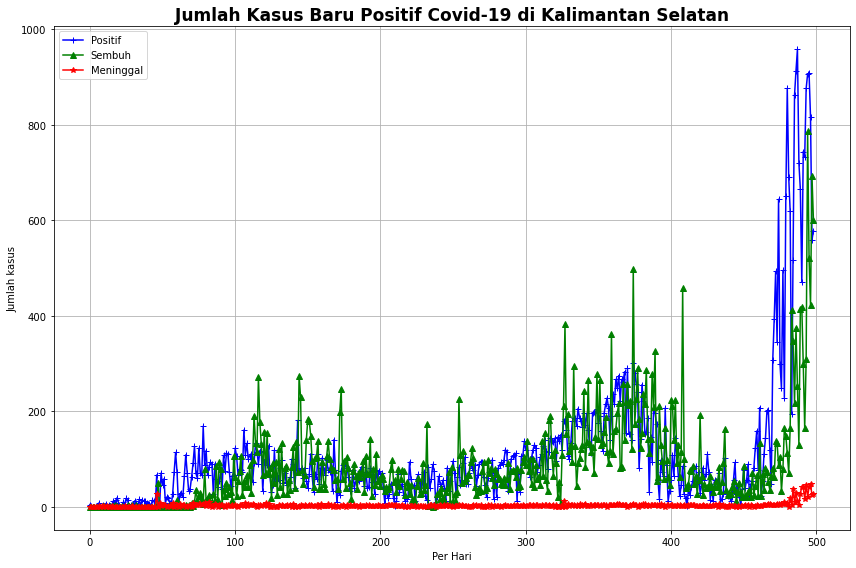

In [35]:
# jumlah kasus positif setiap harinya
import numpy as np

x = np.array(cov_kalsel_new['hari_ke'])
y = np.array(cov_kalsel_new['kasus_baru'])
a = np.array(cov_kalsel_new['sembuh'])
b = np.array(cov_kalsel_new['meninggal'])

plt.clf()
plt.figure(figsize=(12,8))
plt.plot(x, y, color='blue', marker='+', label='Positif')
plt.plot(x, a, color='green', marker='^', label='Sembuh')
plt.plot(x, b, color='red', marker='*', label='Meninggal')
plt.title('Jumlah Kasus Baru Positif Covid-19 di Kalimantan Selatan', fontsize=17, fontweight='bold')
plt.xlabel('Per Hari')
plt.ylabel('Jumlah kasus')
# plt.text(1, -0,1, 'Sumber data: covid.19.go.id', color='blue',
#         ha='right', transform=ax.transAxes)
# ax.xticklabels(ax.get_xticks(), rotation='90')
# ax.xaxis.set_major_locator(mdates.MonthLocator())
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.grid('y')
plt.legend()
plt.tight_layout()
plt.show()

In [36]:
# covid19 di bulan juli di kalsel
cov_july = pd.DataFrame(cov_kalsel_new.iloc[458:488,0])
cov_july['positif'] = cov_kalsel_new['kasus_baru']
cov_july['sembuh'] = cov_kalsel_new['sembuh']
cov_july['meninggal'] = cov_kalsel_new['meninggal']
cov_july

,tanggal,positif,sembuh,meninggal
458,2021-07-01,124,44,1
459,2021-07-02,159,67,4
460,2021-07-03,77,23,1
461,2021-07-04,208,134,1
462,2021-07-05,22,22,2
463,2021-07-06,55,69,5
464,2021-07-07,111,36,5
465,2021-07-08,144,82,3
466,2021-07-09,200,73,3
467,2021-07-10,202,52,6


<Figure size 432x288 with 0 Axes>

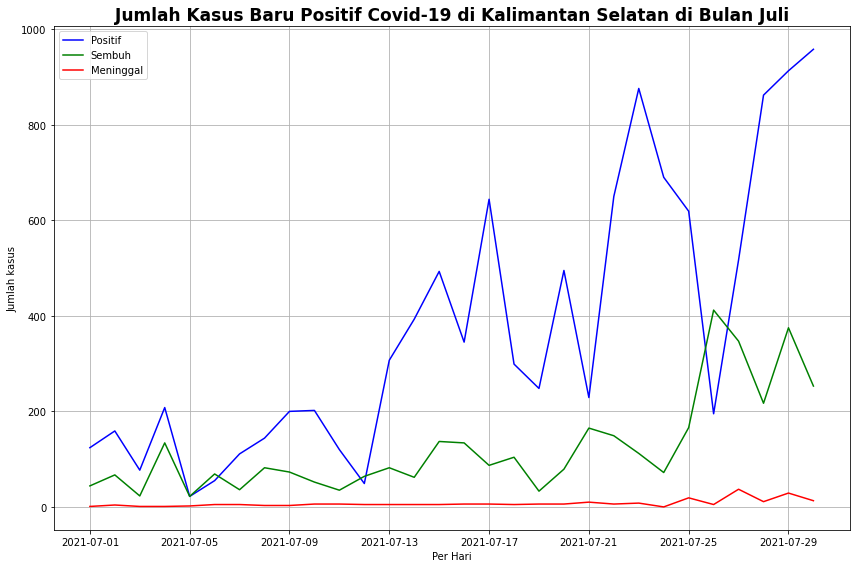

In [37]:
i = np.array(cov_july['tanggal'])
j = np.array(cov_july['positif'])
k = np.array(cov_july['sembuh'])
l = np.array(cov_july['meninggal'])

plt.clf()
plt.figure(figsize=(12,8))
plt.plot(i, j, color='blue', label='Positif')
plt.plot(i, k, color='green', label='Sembuh')
plt.plot(i, l, color='red', label='Meninggal')
plt.title('Jumlah Kasus Baru Positif Covid-19 di Kalimantan Selatan di Bulan Juli', fontsize=17, fontweight='bold')
plt.xlabel('Per Hari')
plt.ylabel('Jumlah kasus')
plt.grid('y')
plt.legend()
plt.tight_layout()
plt.show()

In [38]:
# ploting kasus baik buruk di kalsel
cov_kalsel_new['kasus_pekanlalu'] = cov_kalsel_new['kasus_baru'].shift().replace(np.nan, 0)
cov_kalsel_new['kasus_turun'] = cov_kalsel_new['kasus_baru'] < cov_kalsel_new['kasus_pekanlalu']
cov_kalsel_new['tahun'] = cov_kalsel_new['tanggal'].apply(lambda x: x.year)
cov_kalsel_new

,tanggal,kasus_baru,meninggal,sembuh,base_date,hari_ke,kasus_pekanlalu,kasus_turun,tahun
0,2020-03-30,5,0,0,2020-03-30,0.0,0.0,False,2020
1,2020-03-31,2,0,0,2020-03-30,1.0,5.0,True,2020
2,2020-04-01,0,0,0,2020-03-30,2.0,2.0,True,2020
3,2020-04-02,0,0,0,2020-03-30,3.0,0.0,False,2020
4,2020-04-03,0,0,0,2020-03-30,4.0,0.0,False,2020
...,...,...,...,...,...,...,...,...,...
494,2021-08-06,906,21,786,2020-03-30,494.0,876.0,False,2021
495,2021-08-07,908,42,522,2020-03-30,495.0,906.0,False,2021
496,2021-08-08,817,49,422,2020-03-30,496.0,908.0,True,2021
497,2021-08-09,559,24,693,2020-03-30,497.0,817.0,True,2021


<Figure size 432x288 with 0 Axes>

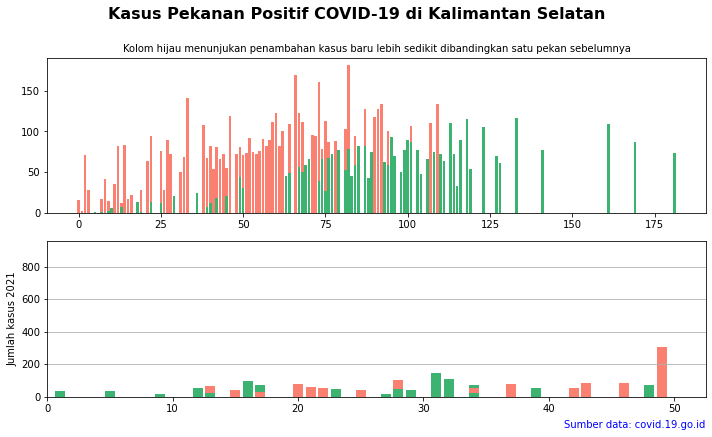

In [39]:
plt.clf()
jml_tahun_terjadi_covid19 = cov_kalsel_new['tahun'].nunique()
tahun_terjadi_covid19 = cov_kalsel_new['tahun'].unique()
fig, axes = plt.subplots(nrows=jml_tahun_terjadi_covid19, 
                         figsize=(10,3*jml_tahun_terjadi_covid19))

fig.suptitle('Kasus Pekanan Positif COVID-19 di Kalimantan Selatan',
             y=1.00, fontsize=16, fontweight='bold', ha='center')
for i, ax in enumerate(axes):
    ax.bar(data=cov_kalsel_new.loc[cov_kalsel_new['tahun']==tahun_terjadi_covid19[i]],
       x='kasus_pekanlalu', height='kasus_baru',
       color=['mediumseagreen' if x is True else 'salmon' 
                  for x in cov_kalsel_new['kasus_turun']])
    if i == 0:
        ax.set_title('Kolom hijau menunjukan penambahan kasus baru lebih sedikit dibandingkan satu pekan sebelumnya', 
                     fontsize=10)
    elif i == jml_tahun_terjadi_covid19-1:
        ax.text(1, -0.2, 'Sumber data: covid.19.go.id', color='blue', 
            ha='right', transform=ax.transAxes)
        ax.set_xlim([0,52.5])
        ax.set_ylim([0, max(cov_kalsel_new['kasus_baru'])])
        ax.set_xlabel('')
        ax.set_ylabel('Jumlah kasus %d'%(tahun_terjadi_covid19[i],))
        ax.grid(axis='y')

plt.tight_layout()
plt.show()

In [40]:
# plotting apakah di hari tersebut naik atau turun
cov_july['kasus_pekanlalu'] = cov_july['positif'].shift().replace(np.nan, 0)
cov_july['kasus_turun'] = cov_july['positif'] < cov_july['kasus_pekanlalu']
cov_july['tahun'] = cov_july['tanggal'].apply(lambda x: x.year)
cov_july

,tanggal,positif,sembuh,meninggal,kasus_pekanlalu,kasus_turun,tahun
458,2021-07-01,124,44,1,0.0,False,2021
459,2021-07-02,159,67,4,124.0,False,2021
460,2021-07-03,77,23,1,159.0,True,2021
461,2021-07-04,208,134,1,77.0,False,2021
462,2021-07-05,22,22,2,208.0,True,2021
463,2021-07-06,55,69,5,22.0,False,2021
464,2021-07-07,111,36,5,55.0,False,2021
465,2021-07-08,144,82,3,111.0,False,2021
466,2021-07-09,200,73,3,144.0,False,2021
467,2021-07-10,202,52,6,200.0,False,2021


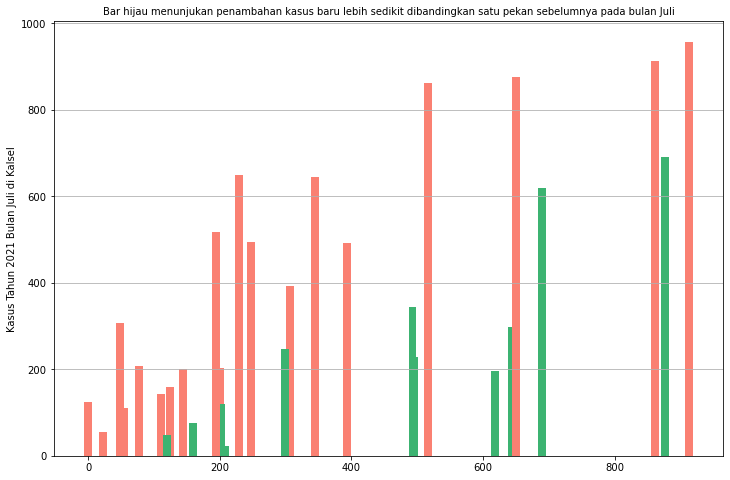

In [41]:
jml_tahun_terjadi_covid19 = cov_july['tahun'].nunique()
tahun_terjadi_covid19 = cov_july['tahun'].unique()

plt.figure(figsize=(12,8))
plt.bar(data=cov_july, width=12, x='kasus_pekanlalu', height='positif', color=['mediumseagreen' if x is True else 'salmon' for x in cov_july['kasus_turun']])
plt.title('Bar hijau menunjukan penambahan kasus baru lebih sedikit dibandingkan satu pekan sebelumnya pada bulan Juli', fontsize=10)
plt.xlabel('')
plt.ylabel('Kasus Tahun 2021 Bulan Juli di Kalsel')
plt.grid(axis='y')
plt.show()

In [42]:
cov_kalsel_new.to_csv('data_covid_kalsel', index=False)

### Memprediksi kasus covid-19 di seminggu kedepan dengan time series forecasting fbprophet dan ARIMA

#### Forecast using fbprophet

In [45]:
positif = cov_kalsel_new[['tanggal','kasus_baru']]
positif.columns = ['ds','y']
positif

,ds,y
0,2020-03-30,5
1,2020-03-31,2
2,2020-04-01,0
3,2020-04-02,0
4,2020-04-03,0
...,...,...
494,2021-08-06,906
495,2021-08-07,908
496,2021-08-08,817
497,2021-08-09,559


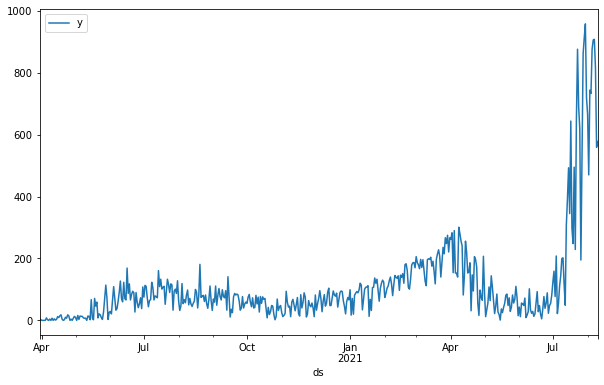

In [48]:
# first kita plot data time series
positif.plot(x='ds', y='y', figsize=(10,6));

In [50]:
# call fungsi prophet dan fit modelnya
from fbprophet import Prophet

model = Prophet(interval_width=0.96, daily_seasonality=True, weekly_seasonality=True, yearly_seasonality=True)
m_fit = model.fit(positif)
m_fit

In [51]:
# kita predict dengan model yang sudah di trained

minggu_depan = model.make_future_dataframe(periods=8, freq='D')
forecast = model.predict(minggu_depan)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-03-30,10.236927,-102.744779,245.682691,10.236927,10.236927,56.116127,56.116127,56.116127,21.137816,...,-39.606628,-39.606628,-39.606628,74.584939,74.584939,74.584939,0.0,0.0,0.0,66.353054
1,2020-03-31,10.673712,-67.554402,267.692937,10.673712,10.673712,83.410630,83.410630,83.410630,21.137816,...,-10.097319,-10.097319,-10.097319,72.370134,72.370134,72.370134,0.0,0.0,0.0,94.084342
2,2020-04-01,11.110497,-75.908376,280.260865,11.110497,11.110497,89.653072,89.653072,89.653072,21.137816,...,-1.457208,-1.457208,-1.457208,69.972464,69.972464,69.972464,0.0,0.0,0.0,100.763568
3,2020-04-02,11.547282,-51.017469,289.818087,11.547282,11.547282,105.463869,105.463869,105.463869,21.137816,...,16.942459,16.942459,16.942459,67.383594,67.383594,67.383594,0.0,0.0,0.0,117.011151
4,2020-04-03,11.984066,-59.782383,300.314075,11.984066,11.984066,105.336312,105.336312,105.336312,21.137816,...,19.601759,19.601759,19.601759,64.596737,64.596737,64.596737,0.0,0.0,0.0,117.320378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,2021-08-14,376.862928,314.647663,667.665707,376.458495,377.231035,105.924051,105.924051,105.924051,21.137816,...,13.526064,13.526064,13.526064,71.260171,71.260171,71.260171,0.0,0.0,0.0,482.786979
503,2021-08-15,379.558521,282.948726,635.127876,378.875698,380.048822,81.704583,81.704583,81.704583,21.137816,...,1.090874,1.090874,1.090874,59.475893,59.475893,59.475893,0.0,0.0,0.0,461.263104
504,2021-08-16,382.254114,228.137754,595.876707,381.408163,382.914434,29.733484,29.733484,29.733484,21.137816,...,-39.606628,-39.606628,-39.606628,48.202296,48.202296,48.202296,0.0,0.0,0.0,411.987598
505,2021-08-17,384.949707,263.546092,608.169223,383.872396,385.805113,48.617987,48.617987,48.617987,21.137816,...,-10.097319,-10.097319,-10.097319,37.577490,37.577490,37.577490,0.0,0.0,0.0,433.567694


In [53]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
502,2021-08-14,376.862928,314.647663,667.665707,376.458495,377.231035,105.924051,105.924051,105.924051,21.137816,...,13.526064,13.526064,13.526064,71.260171,71.260171,71.260171,0.0,0.0,0.0,482.786979
503,2021-08-15,379.558521,282.948726,635.127876,378.875698,380.048822,81.704583,81.704583,81.704583,21.137816,...,1.090874,1.090874,1.090874,59.475893,59.475893,59.475893,0.0,0.0,0.0,461.263104
504,2021-08-16,382.254114,228.137754,595.876707,381.408163,382.914434,29.733484,29.733484,29.733484,21.137816,...,-39.606628,-39.606628,-39.606628,48.202296,48.202296,48.202296,0.0,0.0,0.0,411.987598
505,2021-08-17,384.949707,263.546092,608.169223,383.872396,385.805113,48.617987,48.617987,48.617987,21.137816,...,-10.097319,-10.097319,-10.097319,37.577490,37.577490,37.577490,0.0,0.0,0.0,433.567694
506,2021-08-18,387.645300,257.680629,599.235577,386.227934,388.685654,47.401813,47.401813,47.401813,21.137816,...,-1.457208,-1.457208,-1.457208,27.721204,27.721204,27.721204,0.0,0.0,0.0,435.047113


In [54]:
positif_mingdep = forecast[['ds','yhat']]
positif_mingdep

,ds,yhat
0,2020-03-30,66.353054
1,2020-03-31,94.084342
2,2020-04-01,100.763568
3,2020-04-02,117.011151
4,2020-04-03,117.320378
...,...,...
502,2021-08-14,482.786979
503,2021-08-15,461.263104
504,2021-08-16,411.987598
505,2021-08-17,433.567694


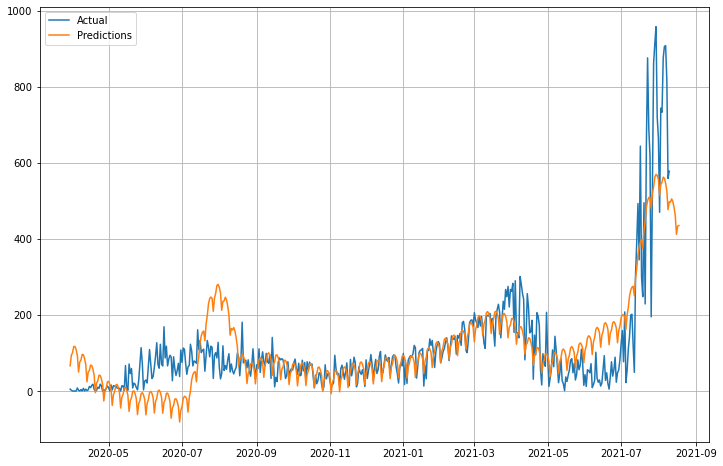

In [58]:
plt.figure(figsize=(12,8))
plt.plot(positif['ds'], positif['y'], label='Actual')
plt.plot(positif_mingdep['ds'], positif_mingdep['yhat'], label='Predictions')
plt.legend()
plt.grid()
plt.show()

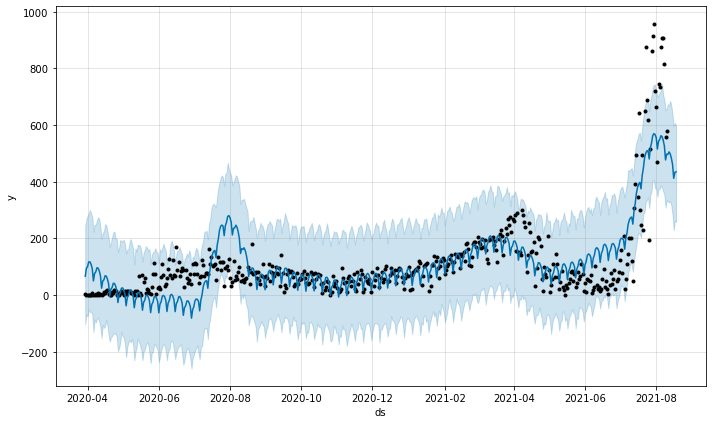

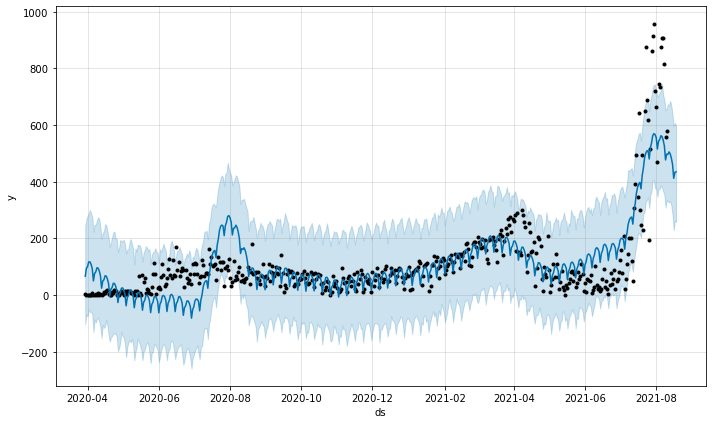

In [55]:
# plot hasil predict

model.plot(forecast)

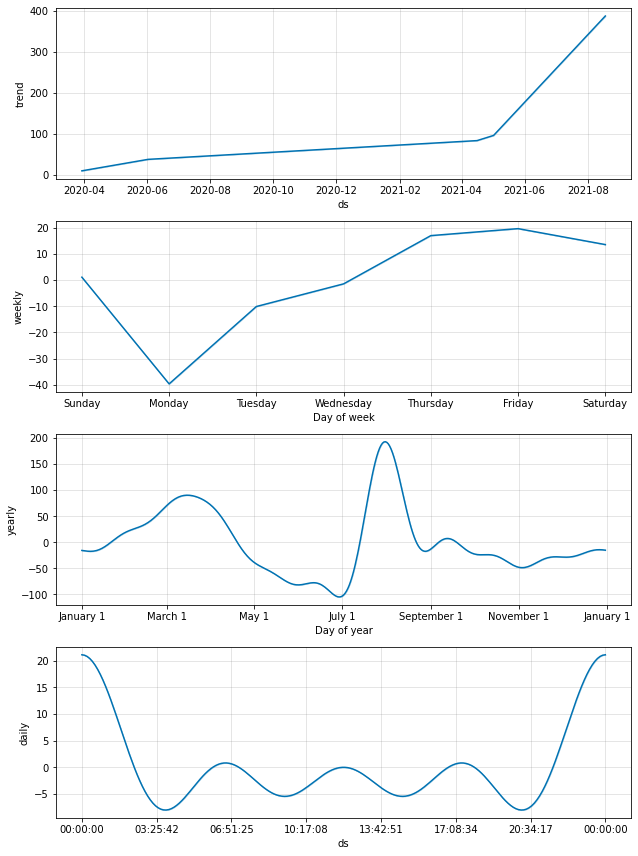

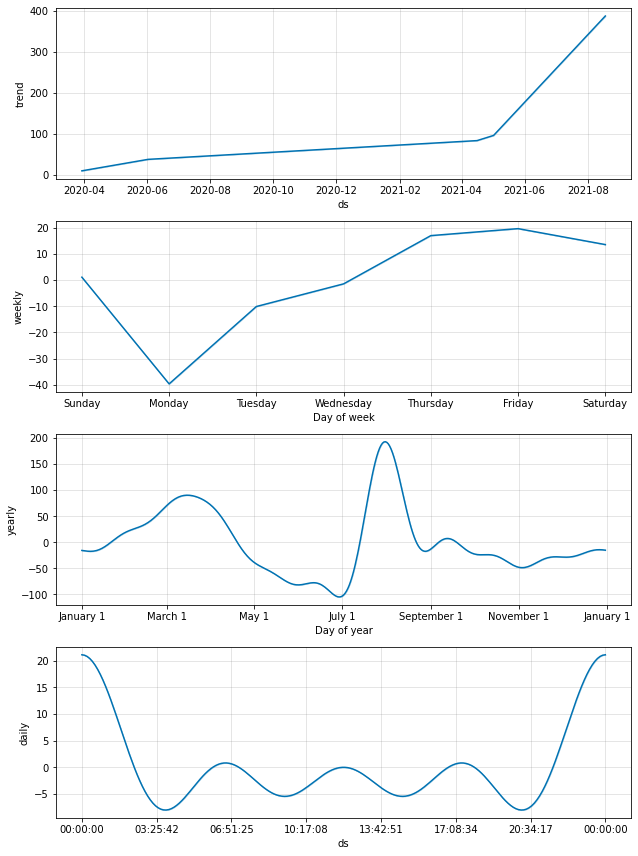

In [57]:
model.plot_components(forecast)

#### Forecast using ARIMA

In [61]:
df_ar = cov_kalsel_new[['tanggal','kasus_baru']]
df_ar.set_index('tanggal', inplace=True)
df_ar

,kasus_baru
tanggal,
2020-03-30,5
2020-03-31,2
2020-04-01,0
2020-04-02,0
2020-04-03,0
...,...
2021-08-06,906
2021-08-07,908
2021-08-08,817


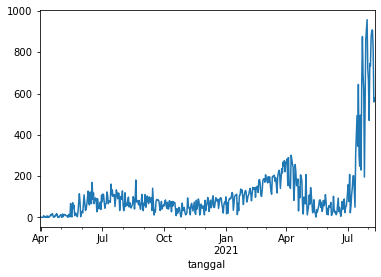

In [63]:
# plot dataframe
df_ar['kasus_baru'].plot();

In [65]:
# cek apakah data stationer atau tidak
# p-value < 0.05 : stationer
# p-value > 0.05 : bukan stationer

from statsmodels.tsa.stattools import adfuller

def ad_test(data):
    dftest = adfuller(df_ar, autolag='AIC')
    print(f'1. ADF: {dftest[0]}')
    print(f'2. P-Value: {dftest[1]}')
    print(f'3. Num of Lags: {dftest[2]}')
    print(f'4. Num Of Observations Used For ADF Regression: {dftest[3]}')
    print(f'5. Critical Values: ')
    for key, val in dftest[4].items():
        print('\t',key , ':' , val)

ad_test(df_ar['kasus_baru'])

1. ADF: -2.1813543079956608
2. P-Value: 0.21308222852737962
3. Num of Lags: 17
4. Num Of Observations Used For ADF Regression: 481
5. Critical Values: 
	 1% : -3.4440184853599876
	 5% : -2.867567599912013
	 10% : -2.5699804779975883


In [66]:
# buat model ARIMA

from pmdarima import auto_arima
m = auto_arima(df_ar['kasus_baru'], trace=True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5507.568, Time=3.44 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5602.741, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5573.599, Time=0.17 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5542.075, Time=0.49 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5600.888, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=5506.141, Time=1.25 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=5505.889, Time=0.72 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=5502.788, Time=1.31 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=5451.538, Time=1.58 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=5367.837, Time=2.88 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=5366.319, Time=2.81 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=5377.883, Time=2.70 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=5361.481, Time=3.41 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=5363.739, Time=3.19 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept

In [71]:
# bagi training & testing data

train, test = df_ar[:400], df_ar[400:]
print(train.shape, test.shape)

(400, 1) (99, 1)


In [72]:
# train model

from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train['kasus_baru'],order=(4,1,3))
model = model.fit()
model.summary()

C:\Users\ACER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\ACER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D.kasus_baru   No. Observations:                  399
Model:                 ARIMA(4, 1, 3)   Log Likelihood               -1950.594
Method:                       css-mle   S.D. of innovations             32.022
Date:                Wed, 11 Aug 2021   AIC                           3919.187
Time:                        22:17:51   BIC                           3955.088
Sample:                    03-31-2020   HQIC                          3933.406
                         - 05-03-2021                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1943      0.384      0.506      0.613      -0.558       0.946
ar.L1.D.kasus_baru     1.1173      0.099     11.258      0.000       0.923       1.312
ar.L2.D.kasus_baru    -0.9843      0.096    -10.283      0.000      -1.172      -0.797
ar.L3.D.kasus_baru     0.0565      0.080      0.706      0.480      -0.100       0.213
ar.L4.D.kasus_baru    -0.1286      0.070     -1.842      0.065      -0.265       0.008
ma.L1.D.kasus_baru    -1.8450      0.089    -20.638      0.000      -2.020      -1.670
ma.L2.D.kasus_baru     1.6742      0.123     13.586      0.000       1.433       1.916
ma.L3.D.kasus_baru    -0.6061      0.074     -8.178      0.000      -0.751      -0.461
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.6224           -0.7942j            1.0090           -0.1442
AR.2            0.6224           +0.7942j            1.0090            0.1442
AR.3           -0.4028           -2.7346j            2.7641           -0.2733
AR.4           -0.4028           +2.7346j            2.7641            0.2733
MA.1            0.6580           -0.8413j            1.0680           -0.1444
MA.2            0.6580           +0.8413j            1.0680            0.1444
MA.3            1.4465           -0.0000j            1.4465           -0.0000
-----------------------------------------------------------------------------
"""

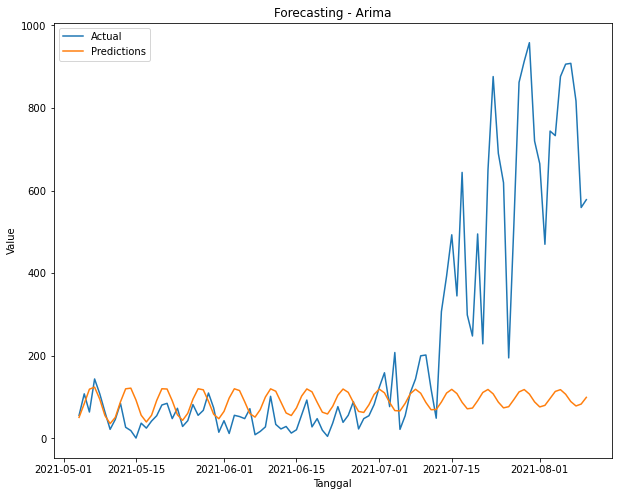

In [73]:
# plot hasil actual dan prediksi

start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')

plt.figure(figsize=(10,8))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, pred, label='Predictions')
plt.title('Forecasting - Arima')
plt.ylabel('Value')
plt.xlabel('Tanggal')
plt.legend()
plt.show()

In [74]:
# evaluasi model

from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(test, pred))
rmse

306.35682164808736